In [1]:
#importando os pacote

import re
import pandas as pd
import sqlite3
import numpy as np
from itertools import zip_longest
import matplotlib.pyplot as plt

In [2]:
conn = sqlite3.connect('FPA_FOD_20170508.sqlite')

In [3]:
tabelas = pd.read_sql_query("SELECT NAME AS 'Table_Name' FROM sqlite_master WHERE type = 'table'", conn)

In [4]:
type(tabelas)

pandas.core.frame.DataFrame

In [5]:
tabelas

,Table_Name
0,spatial_ref_sys
1,spatialite_history
2,sqlite_sequence
3,geometry_columns
4,spatial_ref_sys_aux
5,views_geometry_columns
6,virts_geometry_columns
7,geometry_columns_statistics
8,views_geometry_columns_statistics
9,virts_geometry_columns_statistics


Nesse trabalho em questão eu irei usar principalmente as tabelas 'Fires' e a tabela 'NWCG_UnitIDActive_20170109'

In [6]:
tabelas = ['Fires', 'NWCG_UnitIDActive_20170109']

In [7]:
# Vamos percorrer a lista de tabelas no banco de dados e extrair o esquema de cada uma
for tabela in tabelas:
    consulta = """PRAGMA TABLE_INFO({})""".format(tabela)
    resultado = pd.read_sql_query(consulta, conn)
    print("Esquema da tabela:", tabela)
    display(resultado)
    print("-"*100)
    print("\n")

Esquema da tabela: Fires


,cid,name,type,notnull,dflt_value,pk
0,0,OBJECTID,INTEGER,1,None,1
1,1,FOD_ID,int32,0,None,0
2,2,FPA_ID,text(100),0,None,0
3,3,SOURCE_SYSTEM_TYPE,text(255),0,None,0
4,4,SOURCE_SYSTEM,text(30),0,None,0
5,5,NWCG_REPORTING_AGENCY,text(255),0,None,0
6,6,NWCG_REPORTING_UNIT_ID,text(255),0,None,0
7,7,NWCG_REPORTING_UNIT_NAME,text(255),0,None,0
8,8,SOURCE_REPORTING_UNIT,text(30),0,None,0
9,9,SOURCE_REPORTING_UNIT_NAME,text(255),0,None,0


----------------------------------------------------------------------------------------------------


Esquema da tabela: NWCG_UnitIDActive_20170109


,cid,name,type,notnull,dflt_value,pk
0,0,OBJECTID,INTEGER,1,None,1
1,1,UnitId,text(255),0,None,0
2,2,GeographicArea,text(255),0,None,0
3,3,Gacc,text(255),0,None,0
4,4,WildlandRole,text(255),0,None,0
5,5,UnitType,text(255),0,None,0
6,6,Department,text(255),0,None,0
7,7,Agency,text(255),0,None,0
8,8,Parent,text(255),0,None,0
9,9,Country,text(255),0,None,0


----------------------------------------------------------------------------------------------------




#### Agora começamos a Análise Exploratória dos Dados.

### 1 - De 1992 a 2015 qual ano apresentou a maior e menor taxa de incêncios no mês de janeiro?

In [8]:
consulta_1 = """select datetime(DISCOVERY_DATE) as DISCOVERY_DATE
                from Fires
                where CONT_DATE is not null
             """

In [9]:
resultado1 = pd.read_sql_query(consulta_1, conn)

In [10]:
resultado1[['ANO', 'MES', 'DIA']] = resultado1['DISCOVERY_DATE'].str.split('-', expand=True)

In [11]:
df_question1 = resultado1[resultado1['MES'] == '01']

In [12]:
df_question1.groupby(['ANO']).count().sort_values(['DISCOVERY_DATE'], ascending = False)

,DISCOVERY_DATE,MES,DIA
ANO,,,
2014,4383,4383,4383
2015,3300,3300,3300
2012,3043,3043,3043
2011,2713,2713,2713
2013,2186,2186,2186
1992,2043,2043,2043
1994,1919,1919,1919
1996,1825,1825,1825
2001,1589,1589,1589


In [13]:
df_question1_1 = df_question1.groupby(['ANO']).count()

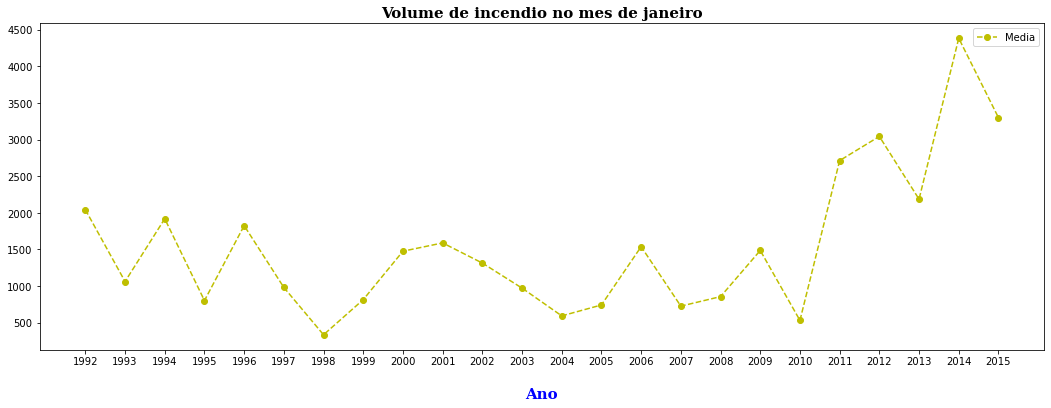

In [14]:
fig, ax = plt.subplots(figsize=(18,6))
    
plt.plot(df_question1_1.index, df_question1_1['MES'], 'y--', label = 'Media', marker = 'o')

plt.title(f"Volume de incendio no mes de janeiro", fontdict  = {'fontsize': '15',
                                                                               'family': 'serif',
                                                                               'fontweight': 'bold',
                                                                               'color': 'black' }, loc = 'center')
#configuração e estilos do label x
plt.xlabel("\nAno", fontdict  = {'fontsize': '15',
                                       'family': 'serif',
                                       'fontweight': 'bold',
                                       'color': 'blue' }, loc = 'center')

ax.legend(loc = 'upper right')

plt.show()

O ano com o maior e menor volume de incendios foram os anos de 2014 e 1998 respectivamente

### 2 - De 1992 a 2015 qual ano teve a menor taxa de incêndios entre os meses de maio e agosto?

In [15]:
df_question2 = resultado1[(resultado1['MES'] == '05') | (resultado1['MES'] == '08')]

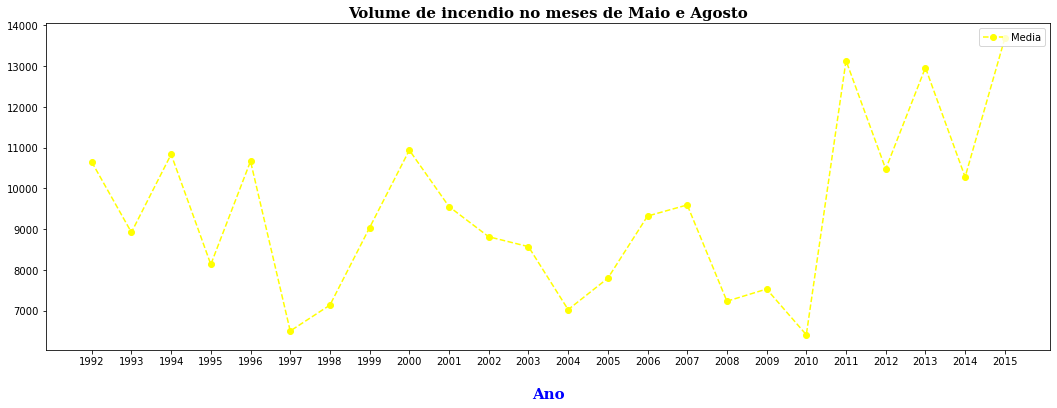

In [16]:
fig, ax = plt.subplots(figsize=(18,6))
    
plt.plot(df_question2.groupby(['ANO']).count().index, df_question2.groupby(['ANO']).count()['MES'], color = 'yellow', linestyle = '--', label = 'Media', marker = 'o')

plt.title(f"Volume de incendio no meses de Maio e Agosto", fontdict  = {'fontsize': '15',
                                                                               'family': 'serif',
                                                                               'fontweight': 'bold',
                                                                               'color': 'black' }, loc = 'center')
#configuração e estilos do label x
plt.xlabel("\nAno", fontdict  = {'fontsize': '15',
                                       'family': 'serif',
                                       'fontweight': 'bold',
                                       'color': 'blue' }, loc = 'center')

ax.legend(loc = 'upper right')

plt.show()

In [17]:
df_question2_1 = resultado1[(resultado1['MES'] == '05')]
df_question2_2 = resultado1[(resultado1['MES'] == '08')]

In [18]:
new1 = df_question2_1.groupby(['ANO']).count()
new2 = df_question2_2.groupby(['ANO']).count()

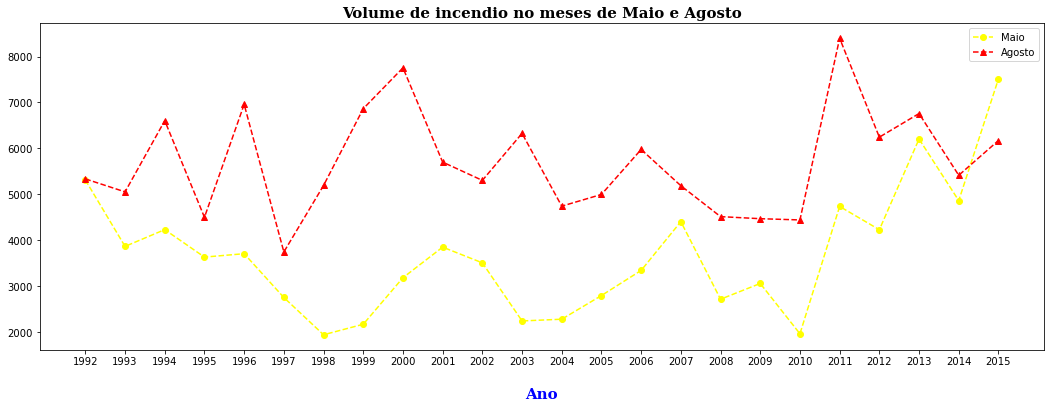

In [19]:
fig, ax = plt.subplots(figsize=(18,6))
    
plt.plot(new1.index, new1['MES'], color = 'yellow', linestyle = '--', label = 'Maio', marker = 'o')
plt.plot(new1.index, new2['MES'], color = 'red', linestyle = '--', label = 'Agosto', marker = '^')

plt.title(f"Volume de incendio no meses de Maio e Agosto", fontdict  = {'fontsize': '15',
                                                                               'family': 'serif',
                                                                               'fontweight': 'bold',
                                                                               'color': 'black' }, loc = 'center')
#configuração e estilos do label x
plt.xlabel("\nAno", fontdict  = {'fontsize': '15',
                                       'family': 'serif',
                                       'fontweight': 'bold',
                                       'color': 'blue' }, loc = 'center')

ax.legend(loc = 'upper right')

plt.show()

Somando ambos os meses de Maio e Agosto, o ano com o menor numero de incendios somados foi o ano de 2010, porem o ano com o menor numero de incendios no mes de Maio foi o ano de 1998, enquanto para o mês de Agosto foi ano de 1997

### 3 - Qual dia do ano de 2007 teve a maior taxa de incidência de incêndios descobertos?

In [20]:
df_question3 = resultado1[resultado1['ANO'] == '2007']

In [21]:
df_question3.groupby(['ANO', 'MES', 'DIA']).count().sort_values(['DISCOVERY_DATE'], ascending = False)

DISCOVERY_DATE
ANO  MES DIA                        
2007 07  06 00:00:00             423
         04 00:00:00             381
         16 00:00:00             370
     04  22 00:00:00             366
         23 00:00:00             360
...                              ...
     12  29 00:00:00               9
         14 00:00:00               8
         30 00:00:00               8
         13 00:00:00               8
         17 00:00:00               7

[365 rows x 1 columns]

Dia 06 de Julho, dia que mais incendios foram declarados no ano de 2007, sendo 371 indentificados

### 4 - Em qual ano do período analisado teve a maior taxa de incêndios controlados no mês de abril?

In [22]:
consulta_4 = """select datetime(CONT_DATE) as CONT_DATE
                from Fires
                where CONT_DATE is not null
             """

In [24]:
resultado4 = pd.read_sql_query(consulta_4, conn)

In [26]:
resultado4[['ANO', 'MES', 'DIA']] = resultado4['CONT_DATE'].str.split('-', expand=True)

In [27]:
display(resultado4)

,CONT_DATE,ANO,MES,DIA
0,2005-02-02 00:00:00,2005,02,02 00:00:00
1,2004-05-12 00:00:00,2004,05,12 00:00:00
2,2004-05-31 00:00:00,2004,05,31 00:00:00
3,2004-07-03 00:00:00,2004,07,03 00:00:00
4,2004-07-03 00:00:00,2004,07,03 00:00:00
...,...,...,...,...
988929,2015-06-14 00:00:00,2015,06,14 00:00:00
988930,2015-10-01 00:00:00,2015,10,01 00:00:00
988931,2015-08-06 00:00:00,2015,08,06 00:00:00
988932,2015-05-28 00:00:00,2015,05,28 00:00:00


In [28]:
condicao = resultado4[resultado4['ANO'] == '2016'].index

In [29]:
resultado4 = resultado4.drop(index = condicao, axis = 0)

In [30]:
resultado4[resultado4['MES'] == '04'].groupby(['ANO']).count().sort_values(['MES'], ascending = False)

,CONT_DATE,MES,DIA
ANO,,,
2015,8154,8154,8154
2014,6890,6890,6890
2012,6716,6716,6716
1996,6243,6243,6243
2013,6169,6169,6169
1995,5972,5972,5972
2011,5927,5927,5927
2005,5529,5529,5529
2006,5510,5510,5510


In [31]:
resultado4_1 = resultado4[resultado4['MES'] == '04'].groupby(['ANO']).count()

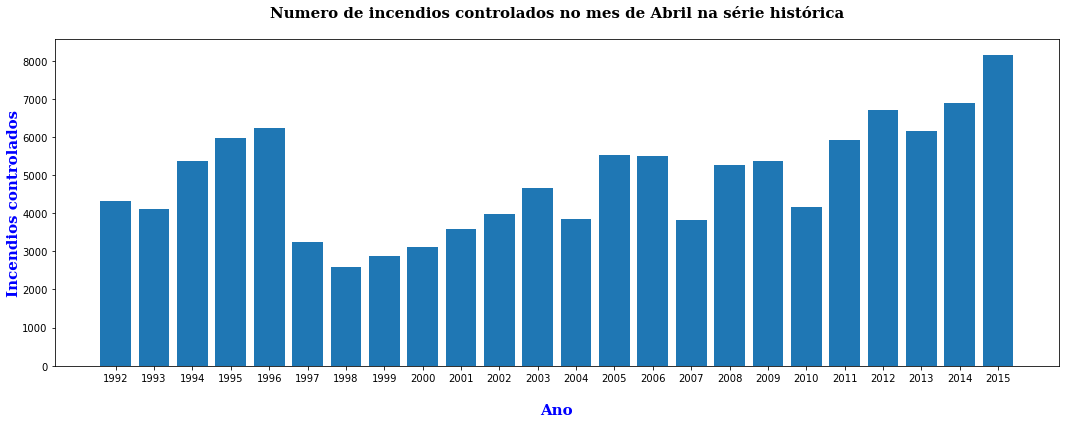

In [32]:
fig, ax = plt.subplots(figsize=(18,6))

plt.bar(resultado4_1.index, resultado4_1['MES'])

#configuração e estilos do titulo
plt.title(f"Numero de incendios controlados no mes de Abril na série histórica\n", fontdict  = {'fontsize': '15',
                                                                               'family': 'serif',
                                                                               'fontweight': 'bold',
                                                                               'color': 'black' }, loc = 'center')
#configuração e estilos do label x
plt.xlabel("\nAno", fontdict  = {'fontsize': '15',
                                       'family': 'serif',
                                       'fontweight': 'bold',
                                       'color': 'blue' }, loc = 'center')
#configuração e estilos do label y
plt.ylabel("Incendios controlados", fontdict  = {'fontsize': '15',
                                       'family': 'serif',
                                       'fontweight': 'bold',
                                       'color': 'blue', 'verticalalignment': 'baseline',
                                        }, loc = 'center')
#legenda automatica configuração e posicionamento da 

plt.show()

Para o mes de Abril o ano de 2015 foi o que teve o maior numero de incendios declarado controlados